In [ ]:
"""
Task 2: Quantitative Analysis using TA-Lib and PyNance
Author: Birhanu Berihun

This notebook computes technical indicators (SMA, RSI, MACD)
and daily returns on stock price data. Uses TA-Lib for indicators
and PyNance for financial metrics.

"""


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from pathlib import Path
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
from datetime import datetime


In [10]:
sns.set(style='whitegrid')

PyNance fetch failed: name 'equity' is not defined
Saving output with indicators...

Plotting indicators...


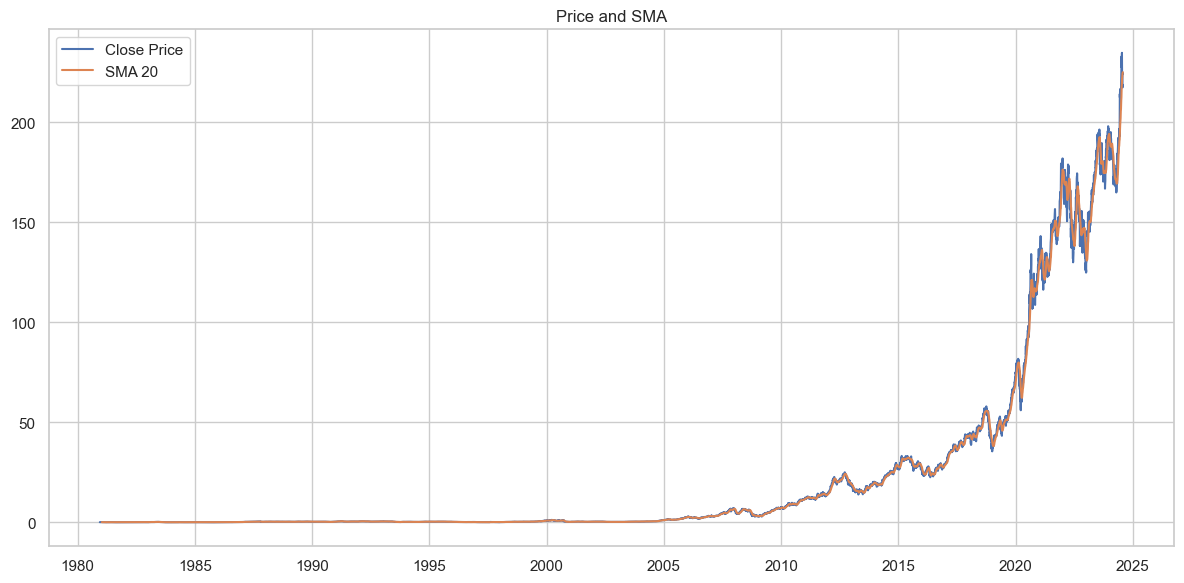

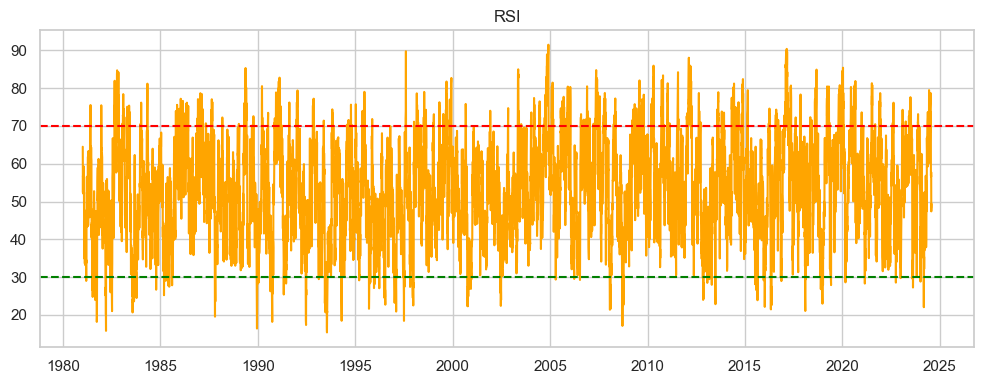

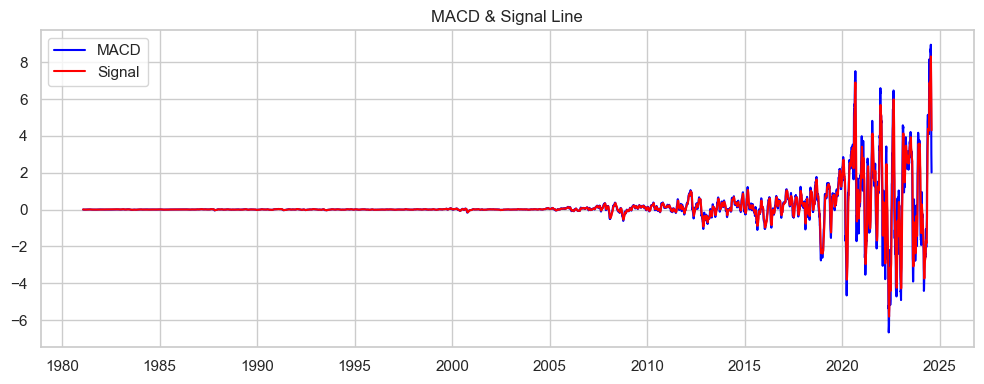

In [11]:
class TechnicalAnalyzer:
    def __init__(self, price_csv):
        self.df = pd.read_csv(price_csv, index_col='Date', parse_dates=True)
    
    def add_indicators(self):
        self.df['SMA_20'] = talib.SMA(self.df['Close'], timeperiod=20)
        self.df['RSI'] = talib.RSI(self.df['Close'], timeperiod=14)
        self.df['MACD'], self.df['MACD_signal'], _ = talib.MACD(self.df['Close'])
    
    def add_returns(self):
        self.df['daily_return'] = self.df['Close'].pct_change()
    
    def fetch_pynance_data(self, symbol='TSLA'):
        try:
            ticker = equity(symbol)
            print(f"\nPyNance - Recent TSLA Close: {ticker.price()}")
        except Exception as e:
            print(f"PyNance fetch failed: {e}")
    
    def plot_price_and_indicators(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.df['Close'], label='Close Price')
        plt.plot(self.df['SMA_20'], label='SMA 20')
        plt.title('Price and SMA')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def plot_rsi(self):
        plt.figure(figsize=(10, 4))
        plt.plot(self.df['RSI'], color='orange')
        plt.axhline(70, color='red', linestyle='--')
        plt.axhline(30, color='green', linestyle='--')
        plt.title('RSI')
        plt.tight_layout()
        plt.show()
    
    def plot_macd(self):
        plt.figure(figsize=(10, 4))
        plt.plot(self.df['MACD'], label='MACD', color='blue')
        plt.plot(self.df['MACD_signal'], label='Signal', color='red')
        plt.title('MACD & Signal Line')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    def save(self, output_path='../data/price_with_indicators.csv'):
        self.df.to_csv(output_path)


if __name__ == "__main__":
    analyzer = TechnicalAnalyzer('../data/yfinance_data/AAPL_historical_data.csv')
    analyzer.add_indicators()
    analyzer.add_returns()
    analyzer.fetch_pynance_data()
    
    print("Saving output with indicators...")
    analyzer.save()

    print("\nPlotting indicators...")
    analyzer.plot_price_and_indicators()
    analyzer.plot_rsi()
    analyzer.plot_macd()